In [75]:
import sys
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline')
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline\quantum_main_project')
import lpfet
import numpy as np
import matplotlib.pyplot as plt
import essentials
import seaborn as sns
import matplotlib.colors as mcolors

import importlib
importlib.reload(lpfet)

<module 'lpfet' from 'C:\\Users\\tinc9\\Documents\\CNRS-offline\\quantum_main_project\\LPFET\\lpfet.py'>

# **Chain** with 6 site and constant potential difference between neighbouring atoms  
```
a-b-c-d-e-f
```
All depends on variable i - element of array x that sets potentials:


| site | external potential | 
| --- | --- |
| a | -2.5i | 
| b | -1.5i |
| c | -0.5i |
| d | +0.5i |
| e | +1.5i |
| f | +2.5i |

In [13]:
x = np.arange(0.05, 2.1, 0.2)
name = 'chain1'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object(name)
    first = False
    print(i, i/max(x))
    pmv = i
    
    nodes_dict = dict()
    edges_dict = dict()
    eq_list = []
    for j in range(6):
        nodes_dict[j] = {'v': -2.5 + j * i, 'U': 1}
        if j != 5:
            edges_dict[(j, j+1)] = 1
        eq_list.append([j])
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    mol1.self_consistent_loop(num_iter=20, tolerance=1E-6, oscillation_compensation=1)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.02439024390243903
Loop 0, Loop 1, -0.5668621380782748->-0.8595657589561599->-0.2530716703389364!=-0.05090697413319528
-1.2243057914103543->-0.6736138160915304->-1.2368069074504406!=-1.4245379379034109
Loop 2, -0.8595657589561599->-0.2530716703389364->-1.093082135869631!=-1.3730856243798624
-0.6736138160915304->-1.2368069074504406->-0.6770674757662483!=-0.4904876652048509
0.27518466365798294->0.37483314893509323->0.09031602699266833!=-0.004523013654806618
Loop 3, -0.2530716703389364->-1.093082135869631->-0.047837619424444755!=0.30057721939061743
-1.2368069074504406->-0.6770674757662483->-1.2511632011996086!=-1.4425284430107288
0.37483314893509323->0.09031602699266833->0.41379511662308327!=0.5216214798332216
-0.37432233666989856->-0.6050601924594541->-0.35690942762577454!=-0.27419250601454803
-0.6405409220606089->-0.5078713450133494->-0.695391595969812!=-0.7578983462886328
Loop 4, -1.0930

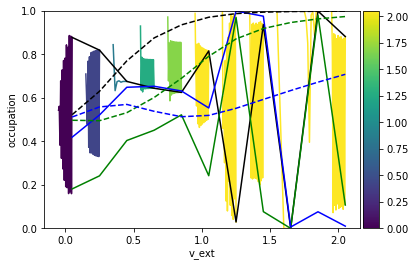

In [16]:
import matplotlib as mpl
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color=colors[x_i])

plt.plot(x, y_simple[:, 0], c='k', label='0, 3')
plt.plot(x, y_simple[:, 1], c='g', label='1, 4')
plt.plot(x, y_simple[:, 2], c='b', label='2, 5')
plt.plot(x, y_ref[:, 0], c='k', linestyle='--', label='0, 3, ref')
plt.plot(x, y_ref[:, 1], c='g', linestyle='--', label='1, 4, ref')
plt.plot(x, y_ref[:, 2], c='b', linestyle='--', label='2, 5, ref')
plt.xlabel("v_ext")
# plt.xlim(-.6, 2.1)
plt.ylabel("occupation")
# plt.legend()
plt.ylim(0,1)
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)
plt.show()

It looks like it is very unstable. I will increase compensation ratio:

In [26]:

lpfet.COMPENSATION_1_RATIO = 0.5


In [45]:
x = np.arange(0.05, 1.1, 0.03)
name = 'chain1'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object(name)
    first = False
    print(i, i/max(x))
    pmv = i
    
    nodes_dict = dict()
    edges_dict = dict()
    eq_list = []
    for j in range(6):
        nodes_dict[j] = {'v': -2.5 + j * i, 'U': 1}
        if j != 5:
            edges_dict[(j, j+1)] = 1
        eq_list.append([j])
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    mol1.self_consistent_loop(num_iter=30, tolerance=0, oscillation_compensation=1)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.04672897196261682
Loop 0, Loop 1, -0.5668621380782748->-0.8595657589561599->-0.4956693057858258!=-0.05090697413319528
-1.2243057914103543->-0.6736138160915304->-1.0115296709068766!=-1.4245379379034109
Loop 2, -0.8595657589561599->-0.4956693057858258->-0.6500789087960783!=-0.8388017569197203
-0.6877498770339834->-0.37432233666989856->-0.49021160856891294!=-0.6318540520010416
Loop 3, -0.4956693057858258->-0.6500789087960783->-0.5490079149090482!=-0.42547670015823363
-1.0115296709068766->-0.8043660969815051->-0.9343470366028201!=-1.0932126294733162
Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, Loop 20, Loop 21, Loop 22, Loop 23, Loop 24, Loop 25, Loop 26, Loop 27, Loop 28, Loop 29, FCI densities (per spin): [0.52318178 0.49729045 0.51242487 0.48757513 0.50270955 0.47681822]
0.08 0.07476635514018691


In [46]:
mol1.plot_hubbard_molecule()

IndexError: list index out of range

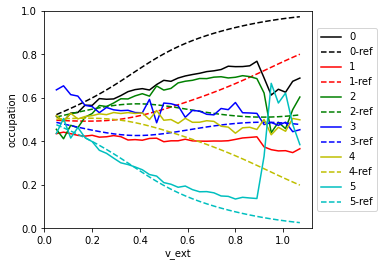

In [49]:
import matplotlib as mpl
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

fig, ax = plt.subplots(1,1)

# for x_i, regime in enumerate(y):
#     mu_ext = x[x_i]
#     length = len(regime)
#     x_data = np.linspace(-0.1, 0, length) + mu_ext
#     plt.plot(x_data, regime[:,0], color=colors[x_i])
color_pallete = ['k', 'r', 'g', 'b', 'y', 'c', 'm']
for i in range(6):
    plt.plot(x, y_simple[:, i], c=color_pallete[i], label=str(i))
    plt.plot(x, y_ref[:, i], c=color_pallete[i], label=str(i)+'-ref', linestyle='--')
plt.xlabel("v_ext")
# plt.xlim(-.6, 2.1)
plt.ylabel("occupation")
plt.ylim(0,1)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
# divider = make_axes_locatable(plt.gca())
# ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
# cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
# plt.gcf().add_axes(ax_cb)
plt.show()

## Chain 2

In [71]:
lpfet.COMPENSATION_1_RATIO = 0.5
x = np.arange(0.05, 1.1, 0.1)
name = 'chain1'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object(name)
    first = False
    print(i, i/max(x))
    pmv = i
    
    nodes_dict = dict()
    edges_dict = dict()
    eq_list = []
    for j in range(6):
        nodes_dict[j] = {'v': (j - 2.5) * i, 'U': 1}
        if j != 5:
            edges_dict[(j, j+1)] = 1
        eq_list.append([j])
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    mol1.mu_hxc = np.linspace(0, 6 * i, 6)
    mol1.self_consistent_loop(num_iter=30, tolerance=1e-6, oscillation_compensation=1)
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.04761904761904761
Loop 0, Loop 1, -0.4030317791416679->-1.035803062756852->-0.4086254868511352!=0.21855208905458168
-1.214317480029297->-0.5859566225688848->-1.1181281429335717!=-1.6502996632982587
Loop 2, -1.035803062756852->-0.4086254868511352->-0.7293272636607693!=-1.0500290404704034
-0.5859566225688848->-1.1181281429335717->-0.8880176462388257!=-0.6579071495440798
0.20381567867233688->0.40458189071780937->0.26762168838636635!=0.13066148605492328
Loop 3, -0.4086254868511352->-0.7293272636607693->-0.5708243577906821!=-0.41232145192059483
Loop 4, 0.26762168838636635->0.3276019864994092->0.27709158459429006!=0.22658118268917093
Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, FCI densities (per spin): [0.52318178 0.49729045 0.51242487 0.48757513 0.50270955 0.47681822]
0.15000000000000002 0.14285714285714285
Loop 0, Loop 1, -0.07542513594671618->-1.3594111037133647->-0.11737643924874597!=1.124658

results/2022_02_14_14_51chain1_molecule.png


C:\Users\tinc9\Documents\CNRS-offline\quantum_main_project\LPFET\lpfet.py:316: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


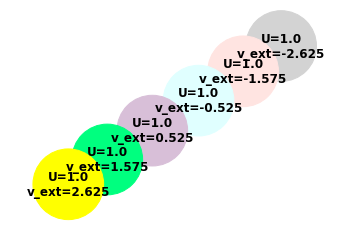

In [72]:
mol1.plot_hubbard_molecule()

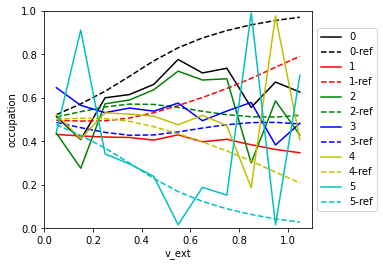

In [73]:
import matplotlib as mpl
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

fig, ax = plt.subplots(1,1)

# for x_i, regime in enumerate(y):
#     mu_ext = x[x_i]
#     length = len(regime)
#     x_data = np.linspace(-0.1, 0, length) + mu_ext
#     plt.plot(x_data, regime[:,0], color=colors[x_i])
color_pallete = ['k', 'r', 'g', 'b', 'y', 'c', 'm']
for i in range(6):
    plt.plot(x, y_simple[:, i], c=color_pallete[i], label=str(i))
    plt.plot(x, y_ref[:, i], c=color_pallete[i], label=str(i)+'-ref', linestyle='--')
plt.xlabel("v_ext")
# plt.xlim(-.6, 2.1)
plt.ylabel("occupation")
plt.ylim(0,1)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
# divider = make_axes_locatable(plt.gca())
# ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
# cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
# plt.gcf().add_axes(ax_cb)
plt.show()

## Many random starting configurations
random values from -1.5 to 1.5

In [79]:
lpfet.COMPENSATION_1_RATIO = 0.5
i = 0.5
name = 'chain2'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
inp_values = []
nodes_dict = dict()
edges_dict = dict()
eq_list = []
for j in range(6):
    nodes_dict[j] = {'v': (j - 2.5) * i, 'U': 1}
    if j != 5:
        edges_dict[(j, j+1)] = 1
    eq_list.append([j])

for temp_var in range(30):
    if not first:
        mol1.clear_object(name)
    first = False
    print(temp_var/30)
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    initial_mu_hxc = np.random.random(6) * 3 - 1.5
    mol1.mu_hxc = initial_mu_hxc
    inp_values.append(initial_mu_hxc)
    mol1.self_consistent_loop(num_iter=30, tolerance=1e-6, oscillation_compensation=1)
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
y_ref = y_ab.diagonal()

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.0
Loop 0, Loop 1, -0.44->0.43->-0.61!=-1.64
0.07->-0.73->-0.02!=0.69
Loop 2, 0.43->-0.61->0.14!=0.88
0.16->0.62->0.30!=-0.03
Loop 3, -0.61->0.14->-0.37!=-0.88
-0.02->-0.44->-0.13!=0.19
1.42->1.72->1.56!=1.39
Loop 4, 0.14->-0.37->-0.03!=0.31
-0.44->-0.13->-0.32!=-0.52
0.30->0.45->0.28!=0.12
Loop 5, -0.37->-0.03->-0.24!=-0.44
-0.13->-0.32->-0.21!=-0.09
2.01->2.02->2.00!=1.98
Loop 6, -0.03->-0.24->-0.12!=-0.01
Loop 7, Loop 8, Loop 9, Loop 10, 0.03333333333333333
Loop 0, Loop 1, 0.40->-1.39->0.17!=1.74
-0.93->0.32->-0.56!=-1.45
1.30->0.92->1.35!=1.77
Loop 2, -1.39->0.17->-0.45!=-1.07
0.32->-0.56->-0.19!=0.18
1.08->1.45->1.26!=1.08
Loop 3, 0.17->-0.45->-0.19!=0.06
1.00->0.78->0.87!=0.96
Loop 4, -0.45->-0.19->-0.40!=-0.62
-0.19->-0.47->-0.28!=-0.09
Loop 5, Loop 6, Loop 7, Loop 8, 0.06666666666666667
Loop 0, Loop 1, 0.06->-1.06->-0.05!=0.97
-0.50->-0.25->-0.42!=-0.59
-0.79->5.34->1.95!=-1.44
1.56->

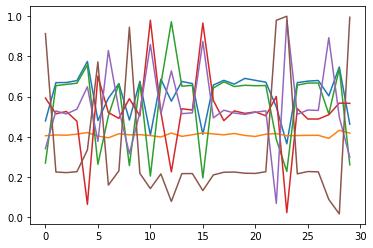

In [82]:
for i in range(6):
    plt.plot(y_simple[:,i])
# This graph is for random from v_hxc_start in [-1.5 to +1.5]

In [83]:
lpfet.COMPENSATION_1_RATIO = 0.5
i = 0.5
name = 'chain2'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
inp_values = []
nodes_dict = dict()
edges_dict = dict()
eq_list = []
for j in range(6):
    nodes_dict[j] = {'v': (j - 2.5) * i, 'U': 1}
    if j != 5:
        edges_dict[(j, j+1)] = 1
    eq_list.append([j])

for temp_var in range(30):
    if not first:
        mol1.clear_object(name)
    first = False
    print(temp_var/30)
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    initial_mu_hxc = np.random.random(6) * 0.1 - 0.05
    mol1.mu_hxc = initial_mu_hxc
    inp_values.append(initial_mu_hxc)
    mol1.self_consistent_loop(num_iter=30, tolerance=1e-6, oscillation_compensation=1)
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
y_ref = y_ab.diagonal()

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.0
Loop 0, Loop 1, -0.67->-0.14->-0.35!=-0.55
1.00->0.70->0.87!=1.04
Loop 2, -0.14->-0.35->-0.22!=-0.10
-0.40->-0.13->-0.29!=-0.44
1.02->1.13->1.07!=1.01
Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, 0.03333333333333333
Loop 0, Loop 1, -0.68->-0.08->-0.32!=-0.55
1.02->0.70->0.89!=1.09
0.98->1.81->1.44!=1.08
0.70->1.40->1.12!=0.84
Loop 2, -0.08->-0.32->-0.20!=-0.09
-0.40->-0.10->-0.27!=-0.45
1.02->1.16->1.10!=1.05
Loop 3, -0.32->-0.20->-0.32!=-0.43
Loop 4, Loop 5, 1.05->1.06->1.06!=1.05
Loop 6, Loop 7, 0.06666666666666667
Loop 0, Loop 1, -0.66->0.10->-0.27!=-0.64
1.16->0.53->0.80!=1.08
Loop 2, Loop 3, 0.92->1.15->1.06!=0.96
Loop 4, Loop 5, Loop 6, Loop 7, 0.1
Loop 0, Loop 1, -0.49->-0.26->-0.39!=-0.53
-0.03->3.63->0.23!=-3.16
1.16->1.02->1.33!=1.64
Loop 2, -0.58->0.58->-0.32!=-1.22
-0.26->-0.39->-0.23!=-0.07
Loop 3, Loop 4, -0.32->-0.27->-0.30!=-0.32
-0.23->-0.31->-0.28!=-0.25
Loop 5, Loop 6

index 0: my result: 0.672, reference: 0.802; difference: -0.130
index 1: my result: 0.407, reference: 0.548; difference: -0.141
index 2: my result: 0.653, reference: 0.564; difference: 0.088
index 3: my result: 0.535, reference: 0.436; difference: 0.099
index 4: my result: 0.516, reference: 0.452; difference: 0.064
index 5: my result: 0.218, reference: 0.198; difference: 0.020


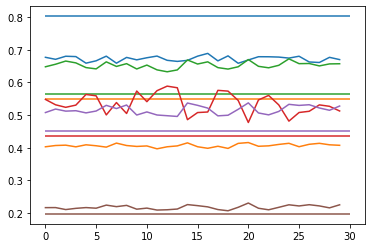

In [92]:
from matplotlib import cm
colors = cm.get_cmap('tab10')(5)

for i in range(6):
    plt.plot(y_simple[:,i], c=cm.get_cmap('tab10')(i))
    plt.hlines(y_ref[i], 0, 30, color=cm.get_cmap('tab10')(i))
    print(f'index {i}: my result: {np.average(y_simple[:,i]):.3f}, reference: {y_ref[i]:.3f}; difference: {np.average(y_simple[:,i])-y_ref[i]:.3f}')

In [93]:
lpfet.COMPENSATION_1_RATIO = 0.5
i = 0.5
name = 'chain2'
mol1 = lpfet.Molecule(6,6, name)
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
inp_values = []
nodes_dict = dict()
edges_dict = dict()
eq_list = []
for j in range(6):
    nodes_dict[j] = {'v': (j - 2.5) * i, 'U': 1}
    if j != 5:
        edges_dict[(j, j+1)] = 1
    eq_list.append([j])

for temp_var in range(30):
    if not first:
        mol1.clear_object(name)
    first = False
    print(temp_var/30)
    t, v_ext, u = lpfet.generate_from_graph(nodes_dict, edges_dict)
    mol1.add_parameters(u, t, v_ext, eq_list)
    initial_mu_hxc = np.random.random(6) * 0.01 - 0.005
    mol1.mu_hxc = initial_mu_hxc
    inp_values.append(initial_mu_hxc)
    mol1.self_consistent_loop(num_iter=30, tolerance=1e-6, oscillation_compensation=1)
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
y_ref = y_ab.diagonal()

for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple) 


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.0
Loop 0, Loop 1, 1.04->0.68->0.90!=1.13
0.71->1.38->1.09!=0.80
1.19->1.01->1.08!=1.15
Loop 2, Loop 3, Loop 4, Loop 5, 0.03333333333333333
Loop 0, Loop 1, -0.66->0.08->-0.29!=-0.65
1.04->0.62->0.85!=1.07
Loop 2, -0.26->-0.21->-0.24!=-0.27
1.11->1.16->1.08!=1.00
Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, 0.06666666666666667
Loop 0, Loop 1, 1.04->0.68->0.90!=1.13
0.70->1.38->1.09!=0.80
1.19->1.01->1.08!=1.15
Loop 2, Loop 3, Loop 4, Loop 5, 0.1
Loop 0, Loop 1, 1.04->0.68->0.90!=1.13
0.71->1.38->1.09!=0.80
1.19->1.01->1.08!=1.15
Loop 2, Loop 3, Loop 4, Loop 5, 0.13333333333333333
Loop 0, Loop 1, 1.04->0.68->0.90!=1.13
0.70->1.38->1.09!=0.80
Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, 0.16666666666666666
Loop 0, Loop 1, 1.05->0.68->0.90!=1.13
0.70->1.39->1.09!=0.80
1.19->1.01->1.08!=1.15
Loop 2, Loop 3, Loop 4, Loop 5, 0.2
Loop 0, Loop 1, 1.04->0.68->0.90!=1.12
0.71->1.38->1.09!=0.80
1.19->1.01-

index 0: my result: 0.680, reference: 0.802; difference: -0.123
index 1: my result: 0.402, reference: 0.548; difference: -0.146
index 2: my result: 0.647, reference: 0.564; difference: 0.083
index 3: my result: 0.554, reference: 0.436; difference: 0.118
index 4: my result: 0.506, reference: 0.452; difference: 0.054
index 5: my result: 0.212, reference: 0.198; difference: 0.014


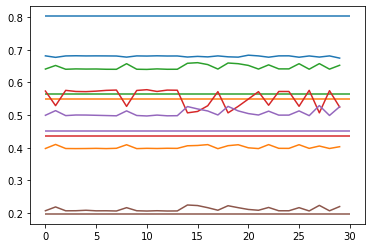

In [94]:
from matplotlib import cm
colors = cm.get_cmap('tab10')(5)

for i in range(6):
    plt.plot(y_simple[:,i], c=cm.get_cmap('tab10')(i))
    plt.hlines(y_ref[i], 0, 30, color=cm.get_cmap('tab10')(i))
    print(f'index {i}: my result: {np.average(y_simple[:,i]):.3f}, reference: {y_ref[i]:.3f}; difference: {np.average(y_simple[:,i])-y_ref[i]:.3f}')

In [98]:
from sklearn.preprocessing import StandardScaler
pca_y = StandardScaler().fit_transform(y_simple) # normalizing the features

from sklearn.decomposition import PCA
pca_model = PCA(n_components=2)
principalComponents_pca_y = pca_model.fit_transform(pca_y)

[0.90147324 0.05480374]


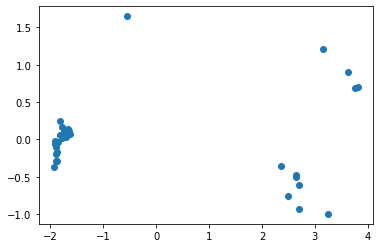

In [103]:
plt.scatter(principalComponents_pca_y[:,0], principalComponents_pca_y[:, 1])
print(pca_model.explained_variance_ratio_)